<a href="https://colab.research.google.com/github/Avnii-Guptaa/Avnii-Guptaa/blob/main/ARIMA_MODEL_TRAINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings("ignore")


In [ ]:
dataset = pd.read_csv("/content/BTC-USD (1).csv")
print(dataset.shape)
dataset.head()

(1827, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-12-21,800.643982,834.281006,799.405029,834.281006,834.281006,155576000
1,2016-12-22,834.179993,875.781982,834.148987,864.539978,864.539978,200027008
2,2016-12-23,864.888000,925.117004,864.677002,921.984009,921.984009,275564000
3,2016-12-24,922.179993,923.479004,886.335022,898.822021,898.822021,137727008
4,2016-12-25,899.651978,899.651978,862.424011,896.182983,896.182983,143664992


In [ ]:
dataset["Date"]=pd.to_datetime(dataset['Date'])
dataset['Year'] = dataset['Date'].dt.year
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,2016-12-21,800.643982,834.281006,799.405029,834.281006,834.281006,155576000,2016
1,2016-12-22,834.179993,875.781982,834.148987,864.539978,864.539978,200027008,2016
2,2016-12-23,864.888000,925.117004,864.677002,921.984009,921.984009,275564000,2016
3,2016-12-24,922.179993,923.479004,886.335022,898.822021,898.822021,137727008,2016
4,2016-12-25,899.651978,899.651978,862.424011,896.182983,896.182983,143664992,2016
...,...,...,...,...,...,...,...,...
1822,2021-12-17,47653.730469,48004.894531,45618.214844,46202.144531,46202.144531,32902725329,2021
1823,2021-12-18,46219.253906,47313.828125,45598.441406,46848.777344,46848.777344,26098292690,2021
1824,2021-12-19,46853.867188,48089.664063,46502.953125,46707.015625,46707.015625,25154053861,2021
1825,2021-12-20,46707.062500,47401.718750,45579.808594,46880.277344,46880.277344,30961902129,2021


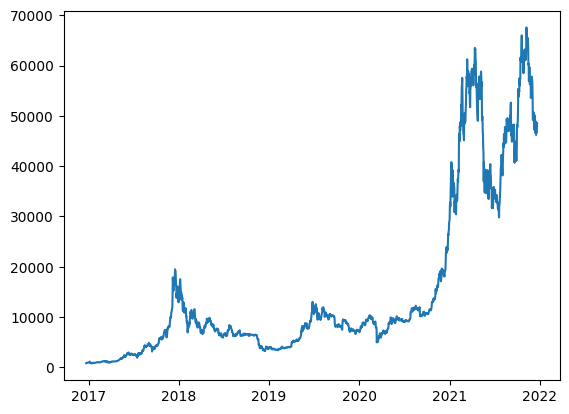

In [ ]:
plt.plot(dataset['Date'],dataset['Close'])

In [ ]:
ts = dataset['Close']

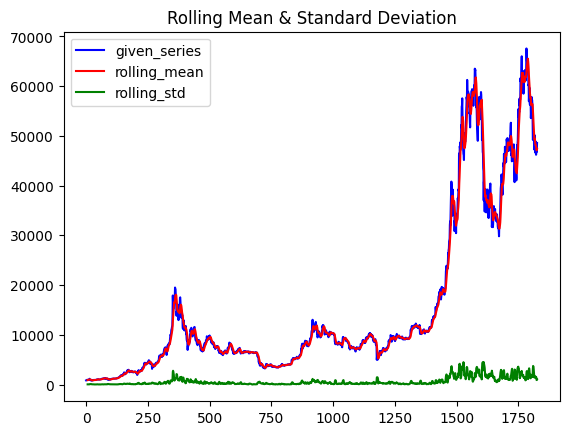

Results of Dickey-Fuller Test:
Test Statistic                   -0.602678
p-value                           0.870376
#Lags Used                       24.000000
Number of Observations Used    1802.000000
Critical Value (1%)              -3.433984
Critical Value (5%)              -2.863145
Critical Value (10%)             -2.567625
dtype: float64


In [ ]:
def test_for_stationary(input_data):
    r_mean = input_data.rolling(window = 7,center=False).mean()
    r_std = input_data.rolling(window = 7,center=False).std()

    # plotting the data
    given = plt.plot(input_data, color = 'blue', label = 'given_series')
    rolling_mean = plt.plot(r_mean, color = 'red', label = 'rolling_mean')
    rolling_std = plt.plot(r_std, color ='green', label = 'rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

     #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(input_data)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

test_for_stationary(ts)

In [ ]:
#Since the p value is greater than 0.05 the time series is non stationary. So we have to use transformations to make the series stationary.


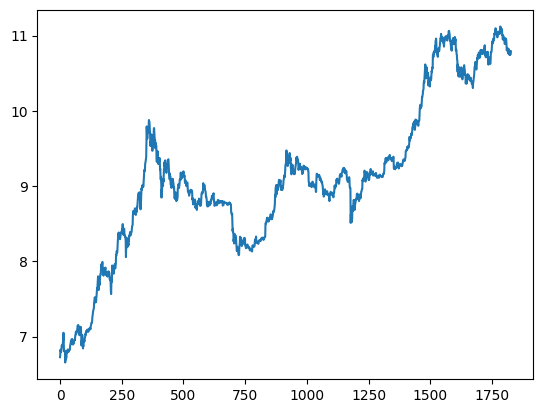

In [ ]:
ts_log = np.log(ts)
plt.plot(ts_log)

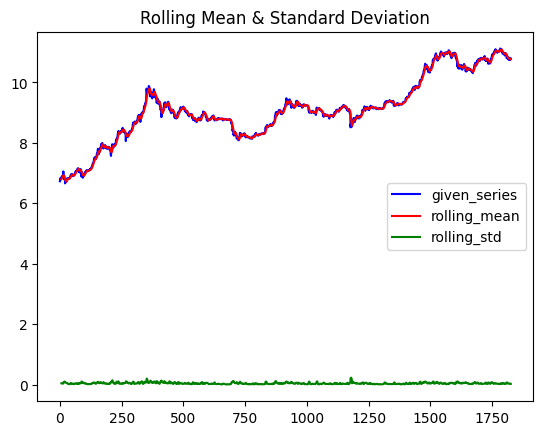

Results of Dickey-Fuller Test:
Test Statistic                   -1.489247
p-value                           0.538824
#Lags Used                        2.000000
Number of Observations Used    1824.000000
Critical Value (1%)              -3.433940
Critical Value (5%)              -2.863126
Critical Value (10%)             -2.567614
dtype: float64


In [ ]:
test_for_stationary(ts_log)


In [ ]:
#The series is still non stationary as p value is still greater than 0.05 so we need to make further transformations.

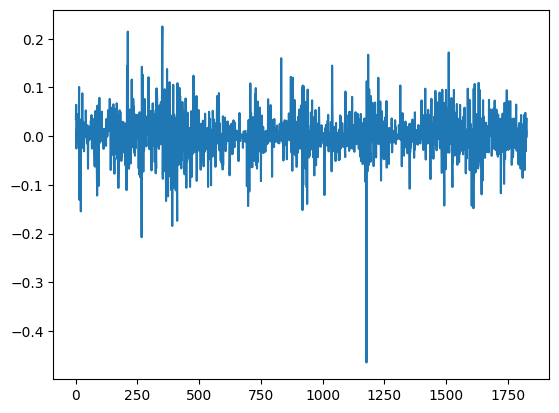

In [ ]:
ts_log_diff = ts_log -ts_log.shift()
plt.plot(ts_log_diff)
#ts_diff_logtrans.head(10)


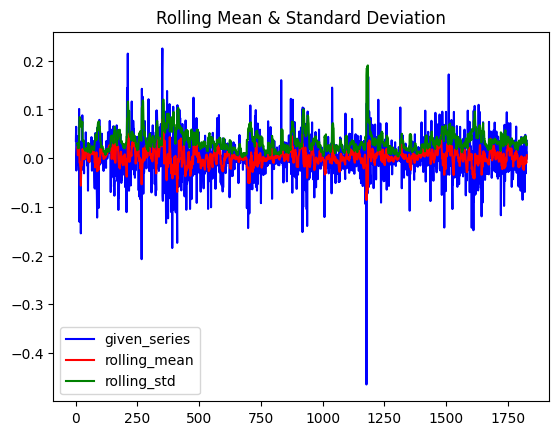

Results of Dickey-Fuller Test:
Test Statistic                  -29.709082
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1824.000000
Critical Value (1%)              -3.433940
Critical Value (5%)              -2.863126
Critical Value (10%)             -2.567614
dtype: float64


In [ ]:
ts_log_diff.dropna(inplace=True)
test_for_stationary(ts_log_diff)

In [ ]:
#As our time series is now stationary asour p value is less than 0.05 therefore we can apply time series forecasting models.



In [ ]:
ts_log_diff.describe()

count    1826.000000
mean        0.002226
std         0.042281
min        -0.464730
25%        -0.015421
50%         0.002415
75%         0.021709
max         0.225119
Name: Close, dtype: float64

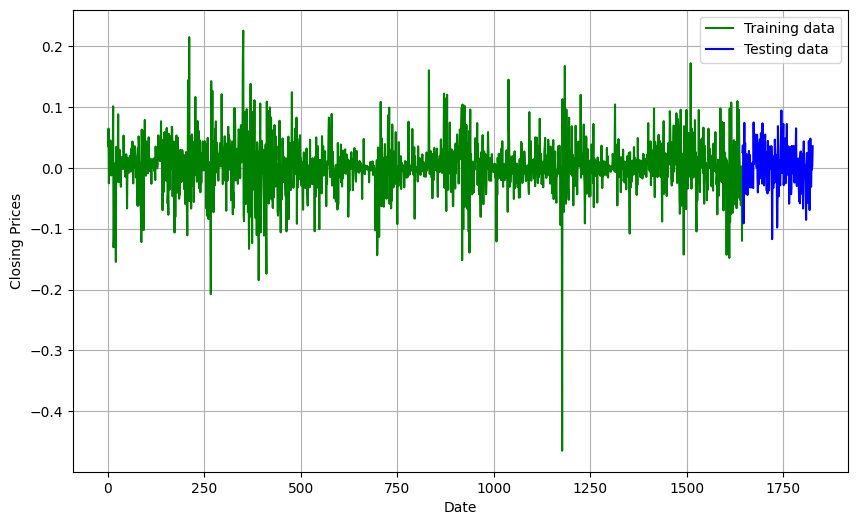

In [ ]:
to_row = int(len(ts_log_diff)*0.9)
training_data = list(ts_log_diff[0:to_row])
testing_data = list(ts_log_diff[to_row:])
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Closing Prices")
plt.plot(ts_log_diff[0:to_row],'green',label="Training data")
plt.plot(ts_log_diff[to_row:],'blue',label="Testing data")
plt.legend()


In [ ]:
#          ARIMA MODEL CREATION

In [ ]:
#The first model we are about to create has p=4,d=1 and q=1.

In [ ]:
model_predictions=[]
error_list=[]
n_test_observ = len(testing_data)

In [ ]:
for i in range (n_test_observ):
    model = ARIMA(training_data, order = (4, 1, 1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

    # Calculating the error
    error = ((abs(yhat - actual_test_value)) / actual_test_value) * 100

    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (yhat, actual_test_value, error), '%')



# After iterating over whole test set the overall mean error is calculated.
print('\n Mean Error in Predicting  : %f ' % (sum(error_list)/float(len(error_list))), '%')

predicted = 0.005149,   expected = 0.025833,   error = 80.069035  %
predicted = -0.005037,   expected = 0.036767,   error = 113.699503  %
predicted = 0.001302,   expected = 0.027476,   error = 95.261694  %
predicted = 0.001787,   expected = -0.091305,   error = -101.957488  %
predicted = 0.005956,   expected = 0.017188,   error = 65.348890  %
predicted = -0.002876,   expected = 0.073747,   error = 103.899921  %
predicted = -0.000063,   expected = -0.006233,   error = -98.992292  %
predicted = 0.004215,   expected = 0.040785,   error = 89.664170  %
predicted = 0.000278,   expected = -0.023325,   error = -101.189899  %
predicted = 0.004903,   expected = -0.042818,   error = -111.449914  %
predicted = 0.002176,   expected = 0.009632,   error = 77.409775  %
predicted = -0.000265,   expected = 0.022505,   error = 101.176627  %
predicted = 0.001116,   expected = 0.017704,   error = 93.694712  %
predicted = 0.001646,   expected = -0.044675,   error = -103.684309  %
predicted = 0.003947,   exp

In [ ]:
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1825
Model:                 ARIMA(4, 1, 1)   Log Likelihood                3179.959
Date:                Tue, 21 Nov 2023   AIC                          -6347.917
Time:                        06:28:28   BIC                          -6314.864
Sample:                             0   HQIC                         -6335.724
                               - 1825                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0319      0.017     -1.896      0.058      -0.065       0.001
ar.L2          0.0290      0.020      1.431      0.152      -0.011       0.069
ar.L3         -0.0013      0.021     -0.061      0.9

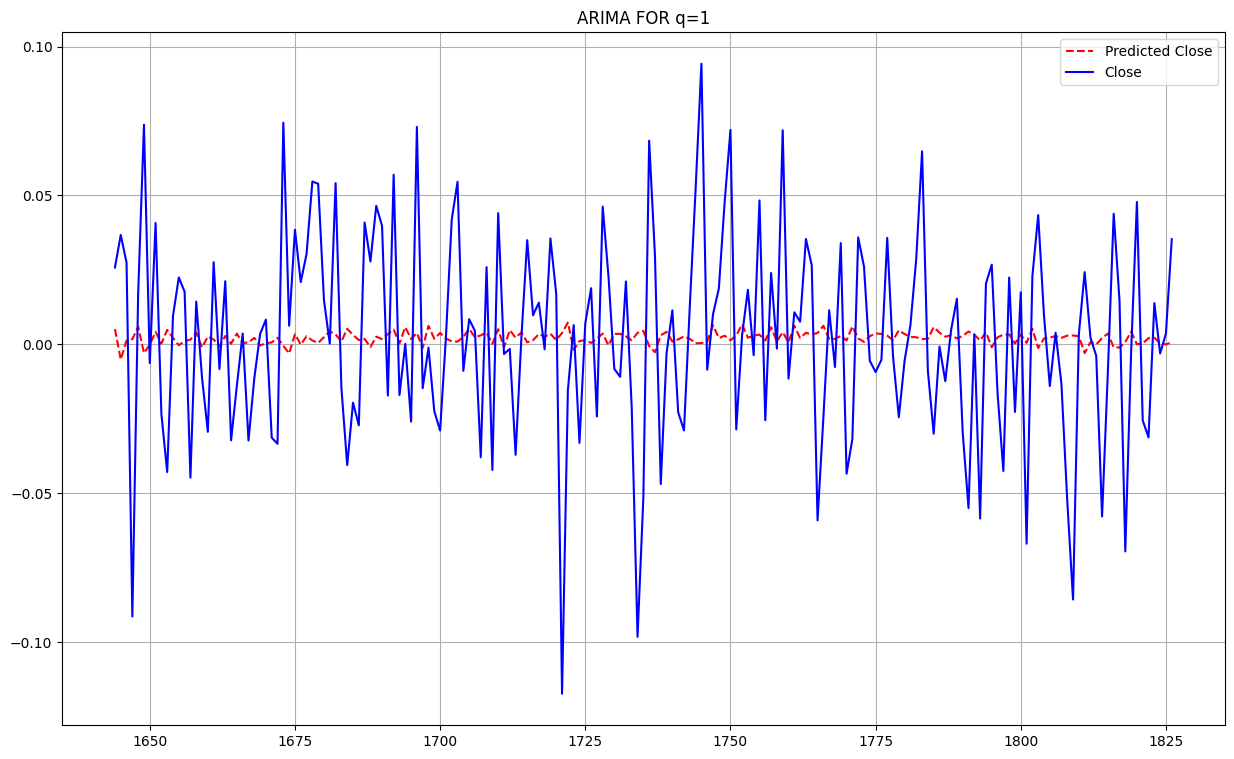

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)

data_range = ts_log_diff[to_row:].index

plt.title ('ARIMA FOR q=1')
#plt.plot(ts_log_diff)
plt.plot(data_range,model_predictions,color = 'red', linestyle = 'dashed',label='Predicted Close')
plt.plot(data_range,testing_data,color = 'blue',label='Close')
plt.legend(['Predicted Close','Close'])

In [ ]:
predict_q1 = model_fit.predict()
predict_q1

array([0.        , 0.03562726, 0.04909773, ..., 0.0015396 , 0.00080053,
       0.00159479])

In [ ]:
mse1 = mean_squared_error(testing_data, model_predictions)
mse1

0.001234471863317053

In [ ]:
#The second model we are about to create has p=4,d=1 and q=2.

In [ ]:
model_predictions=[]
len(model_predictions)


0

In [ ]:
training_data = list(ts_log_diff[0:to_row])

In [ ]:
for i in range (n_test_observ):
    model = ARIMA(training_data,order=(4,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

    # Calculating the error
    error = ((abs(yhat - actual_test_value)) / actual_test_value) * 100

    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (yhat, actual_test_value, error), '%')



# After iterating over whole test set the overall mean error is calculated.
print('\n Mean Error in Predicting  : %f ' % (sum(error_list)/float(len(error_list))), '%')

predicted = 0.003532,   expected = 0.025833,   error = 86.326689  %
predicted = -0.002440,   expected = 0.036767,   error = 106.636919  %
predicted = -0.000411,   expected = 0.027476,   error = 101.495744  %
predicted = 0.002170,   expected = -0.091305,   error = -102.376795  %
predicted = 0.006103,   expected = 0.017188,   error = 64.495707  %
predicted = -0.003450,   expected = 0.073747,   error = 104.677769  %
predicted = -0.000127,   expected = -0.006233,   error = -97.968594  %
predicted = 0.003494,   expected = 0.040785,   error = 91.433773  %
predicted = 0.001714,   expected = -0.023325,   error = -107.348131  %
predicted = 0.003954,   expected = -0.042818,   error = -109.235246  %
predicted = 0.002173,   expected = 0.009632,   error = 77.435100  %
predicted = 0.000058,   expected = 0.022505,   error = 99.741817  %
predicted = 0.000479,   expected = 0.017704,   error = 97.291804  %
predicted = 0.001655,   expected = -0.044675,   error = -103.704526  %
predicted = 0.004045,   exp

In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1825
Model:                 ARIMA(4, 1, 2)   Log Likelihood                3180.456
Date:                Tue, 21 Nov 2023   AIC                          -6346.912
Time:                        06:37:34   BIC                          -6308.350
Sample:                             0   HQIC                         -6332.687
                               - 1825                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9024      0.202     -4.477      0.000      -1.297      -0.507
ar.L2          0.0023      0.026      0.092      0.927      -0.048       0.052
ar.L3          0.0248      0.027      0.916      0.3

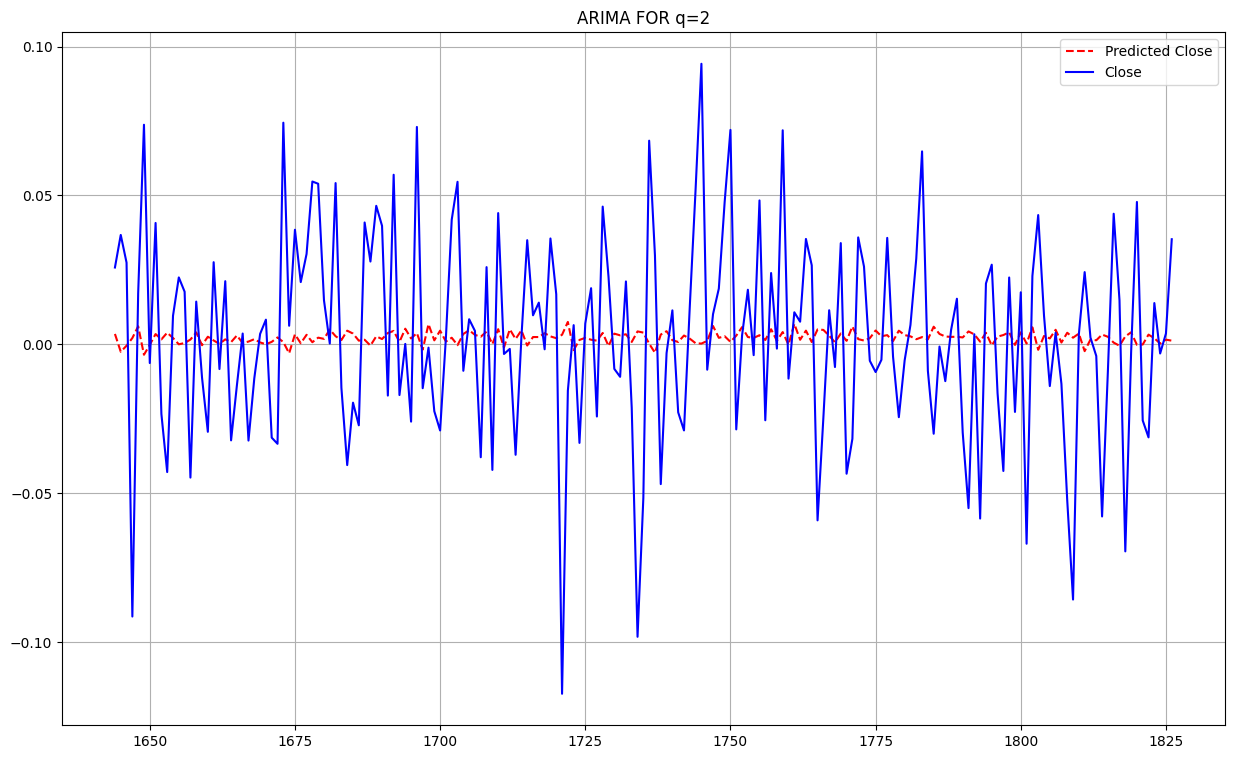

In [ ]:
plt.figure(figsize=(15,9))
plt.grid(True)
plt.title ('ARIMA FOR q=2')

data_range = ts_log_diff[to_row:].index

plt.plot(data_range,model_predictions,color = 'red', linestyle = 'dashed',label='Predicted Close')
plt.plot(data_range,testing_data,color = 'blue',label='Close')


plt.legend()
plt.show()

In [ ]:
predict_q2 = model_fit.predict()
predict_q2

array([0.        , 0.03562726, 0.04908361, ..., 0.00215167, 0.00031807,
       0.00158959])

In [ ]:
mse2 = mean_squared_error(testing_data, model_predictions)
mse2

0.0012339209629027505

In [ ]:
### comparing our Models

In [ ]:
compDf = pd.DataFrame({'ARIMA (4,1,1)': predict_q1, 'ARIMA (4,1,2)': predict_q2})
compDf

,"ARIMA (4,1,1)","ARIMA (4,1,2)"
0,0.000000,0.000000
1,0.035627,0.035627
2,0.049098,0.049084
3,0.028379,0.028423
4,0.017516,0.017433
...,...,...
1820,0.000315,-0.000086
1821,0.002730,0.003169
1822,0.001540,0.002152
1823,0.000801,0.000318


In [ ]:
msErrors = pd.DataFrame({'ARIMA (4,1,1)': mse1, 'ARIMA (4,1,2)': mse2},index=[0])
msErrors

,"ARIMA (4,1,1)","ARIMA (4,1,2)"
0,0.001234,0.001234
